In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
df1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [ ]:
df1_generation.head()

In [ ]:
print('Rows     :',df1_generation.shape[0])
print('Columns  :',df1_generation.shape[1])
print('\nFeatures :\n     :',df1_generation.columns.tolist())
print('\nMissing values    :',df1_generation.isnull().values.sum())
print('\nUnique values :  \n',df1_generation.nunique())

In [ ]:
df1_weather.head()

In [ ]:
print('Rows     :',df1_weather.shape[0])
print('Columns  :',df1_weather.shape[1])
print('\nFeatures :\n     :',df1_weather.columns.tolist())
print('\nMissing values    :',df1_weather.isnull().values.sum())
print('\nUnique values :  \n',df1_weather.nunique())

In [ ]:
print(df1_generation.info())

In [ ]:
print(df1_weather.info())

In [ ]:
df1_generation["DATE_TIME"] = pd.to_datetime(df1_generation["DATE_TIME"])
df1_weather["DATE_TIME"] = pd.to_datetime(df1_weather["DATE_TIME"])

In [ ]:
df1_generation["DATE_TIME"]

In [ ]:
#extracting time and date from datetime in plant1 generation
df1_generation['DATE_TIME'] = pd.to_datetime(df1_generation['DATE_TIME'], errors='coerce')
df1_generation['time'] = df1_generation['DATE_TIME'].dt.time
df1_generation['date'] = pd.to_datetime(df1_generation['DATE_TIME'].dt.date)

In [ ]:
df1_generation['time']

In [ ]:
df1_generation['date']

In [ ]:
#plant2 dataset
df2_generation=pd.read_csv('Plant_2_Generation_Data.csv')
df2_weather=pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [ ]:
df2_generation.head()

In [ ]:
print('Rows     :',df2_generation.shape[0])
print('Columns  :',df2_generation.shape[1])
print('\nFeatures :\n     :',df2_generation.columns.tolist())
print('\nMissing values    :',df2_generation.isnull().values.sum())
print('\nUnique values :  \n',df2_generation.nunique())

In [ ]:
df2_weather.head()

In [ ]:
print('Rows     :',df2_weather.shape[0])
print('Columns  :',df2_weather.shape[1])
print('\nFeatures :\n     :',df2_weather.columns.tolist())
print('\nMissing values    :',df2_weather.isnull().values.sum())
print('\nUnique values :  \n',df2_weather.nunique())

In [ ]:
print(df2_generation.info())

In [312]:
print(df2_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB
None


In [315]:
#extracting time and date from datetime in plant2 generation
df2_generation['DATE_TIME'] = pd.to_datetime(df2_generation['DATE_TIME'], errors='coerce')
df2_generation['time'] = df2_generation['DATE_TIME'].dt.time
df2_generation['date'] = pd.to_datetime(df2_generation['DATE_TIME'].dt.date)

In [316]:
df2_generation['time']

0        00:00:00
1        00:00:00
2        00:00:00
3        00:00:00
4        00:00:00
           ...   
67693    23:45:00
67694    23:45:00
67695    23:45:00
67696    23:45:00
67697    23:45:00
Name: time, Length: 67698, dtype: object

In [317]:
df1_generation['DATE_TIME']= pd.to_datetime(df1_generation['DATE_TIME'],format='%d-%m-%Y %H:%M')
df1_weather['DATE_TIME']= pd.to_datetime(df1_weather['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

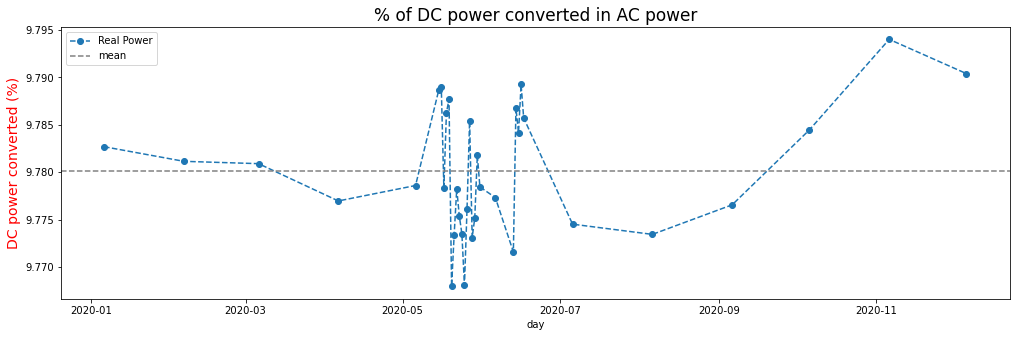

In [318]:
#real dc power converted,comparing how much of dc power is converted to ac power during day hours in plant1 generation
losses=df1_generation.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

As we can see in the above PLANT_1 it's able to convert about only 9-10 % of DC POWER produced by module: Inverters are inefficient!

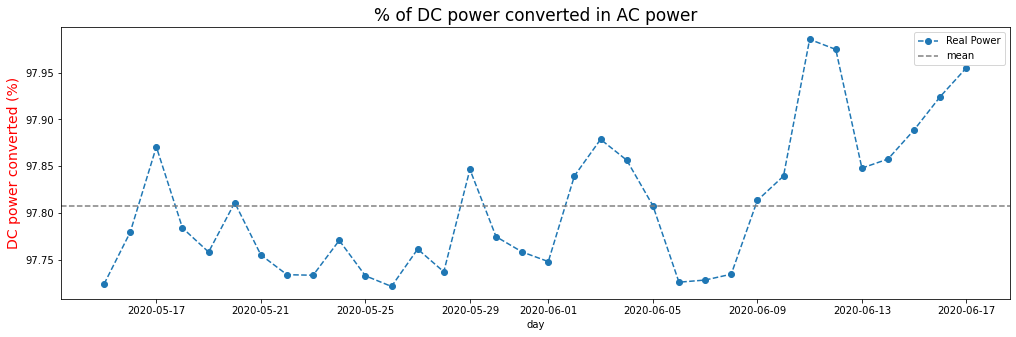

In [319]:
#dc power converted to ac power in plant2 generation
losses=df2_generation.copy()
losses['day']=losses['DATE_TIME'].dt.date
losses=losses.groupby('day').sum()
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='red')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

As we can see in the  above PLANT_2 it's able to convert  nearly 100% of DC POWER produced by module: Inverters are efficient!

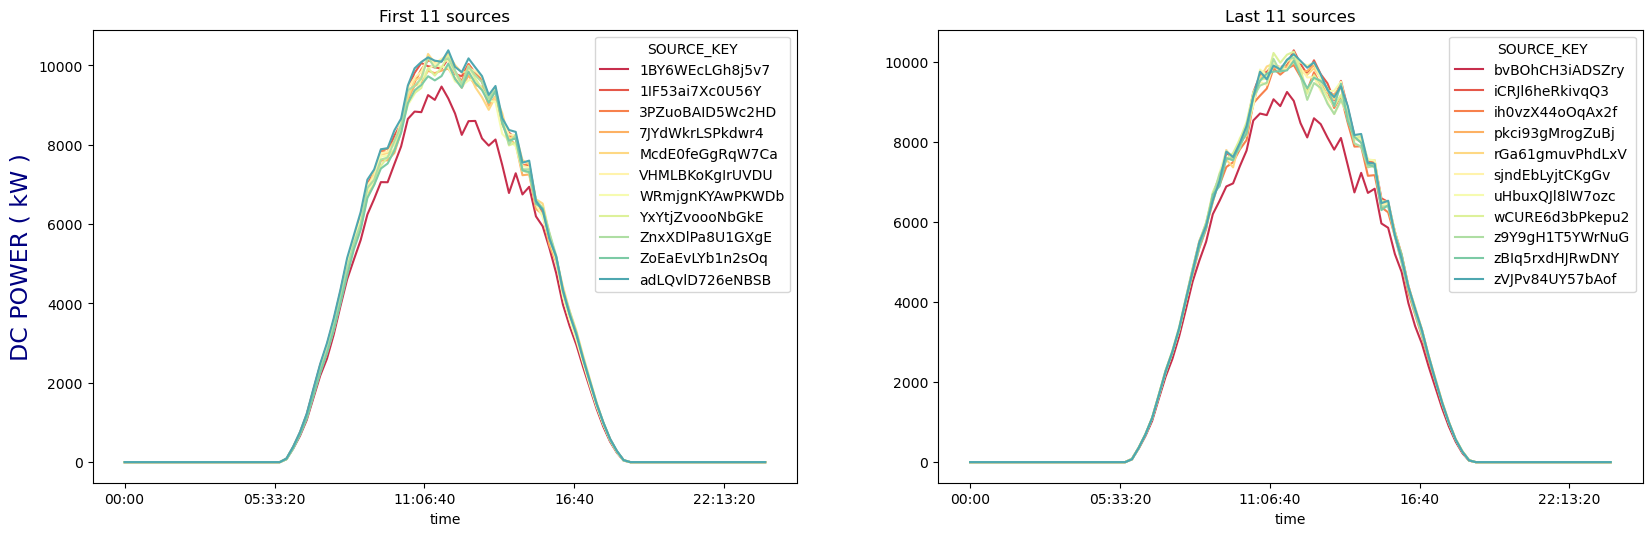

In [320]:
#to check which inverter is underperforming in plant1 generation
dc_gen=df1_generation.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

in the above graph we can see that 1BY6WEcLGh8j5v7 and bvBOhCH3iADSZry are underperforming inverters in plant 1

<ipython-input-321-846e47527538>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_source['time']=worst_source['DATE_TIME'].dt.time
<ipython-input-321-846e47527538>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst_source['day']=worst_source['DATE_TIME'].dt.date
C:\Users\LAKSHMI\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(
C:\Users\LAKSHMI\anaconda3\lib\site-packages\pandas\plotting\_matplo

NameError: name 'cols' is not defined

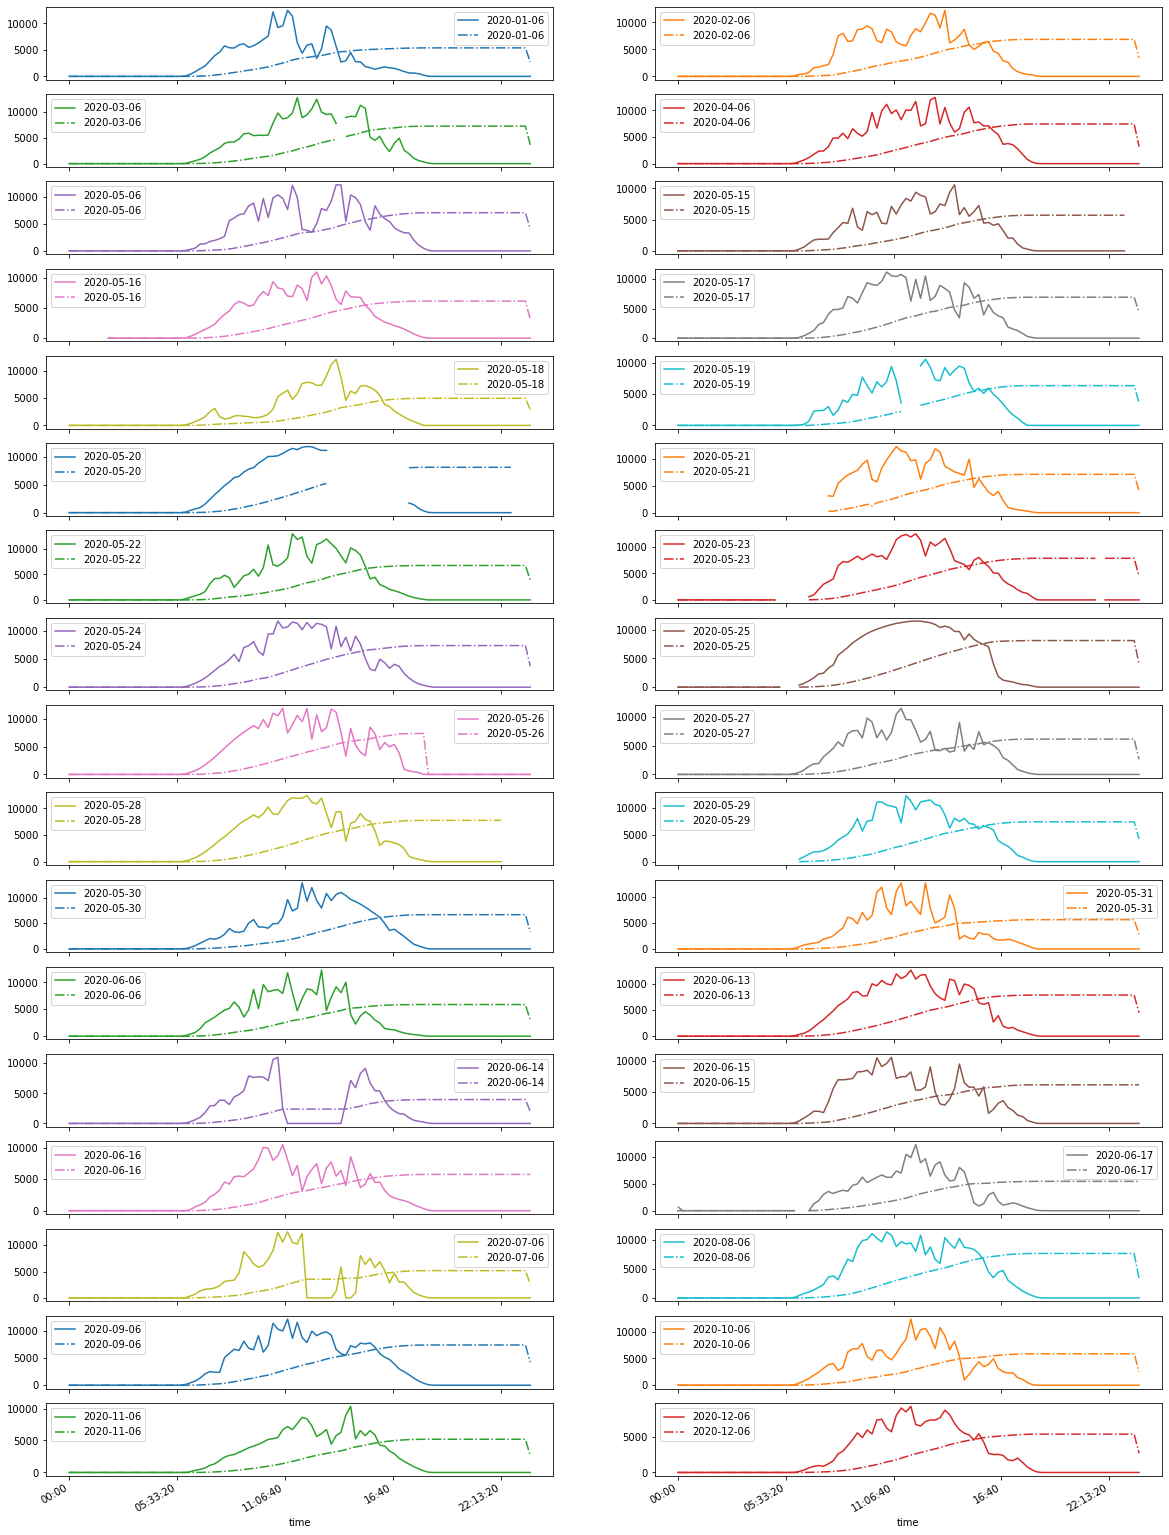

In [321]:
#plant1 generation underperformed inverter action
worst_source=df1_generation[df1_generation['SOURCE_KEY']=='bvBOhCH3iADSZry']
worst_source['time']=worst_source['DATE_TIME'].dt.time
worst_source['day']=worst_source['DATE_TIME'].dt.date

ax=worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

As we can see between the 7th and 14th of June the dc power produced by the inverter goes quickly to 0 exactly during maximum sunlight hours, between 11 am and 16 pm. This can only be due to a fault in the inverter, so maybe these inverters requires to be fixed or replaced.

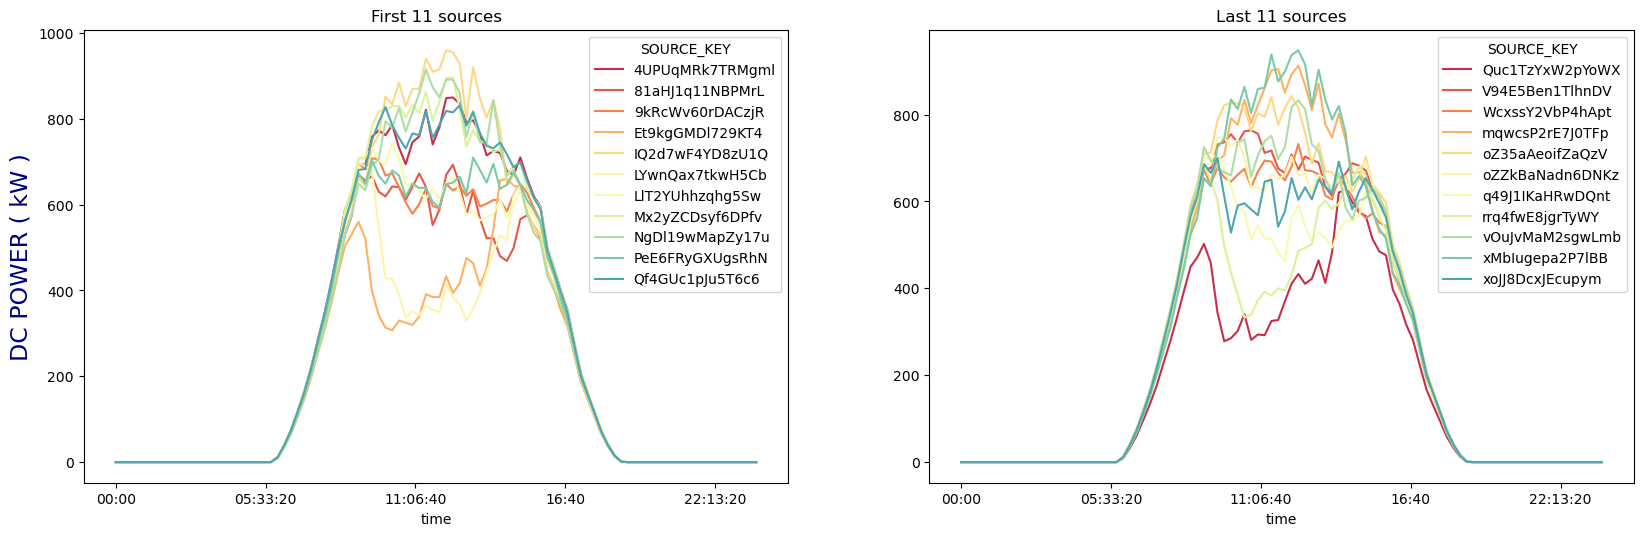

In [322]:
#to check which inverter is underperforming in plant2 generation
dc_gen=df2_generation.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

in the above graph Et9kgGMD1729KT4 and QuclTzYxW2pyoWX are the underperforming inverters in plant 2

Text(0, 0.5, 'Power (KW)')

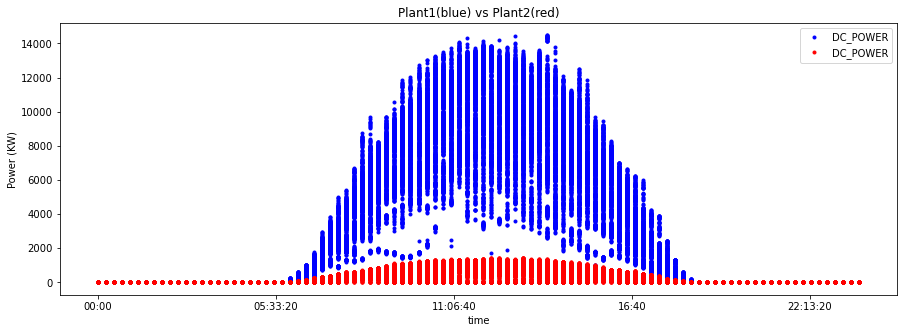

In [323]:
#comparing dc values of two plants generation,
ax = df1_generation.plot(x='time', y='DC_POWER', figsize=(15,5), legend=True, style='b.')
df2_generation.plot(x='time', y='DC_POWER', legend=True, style='r.', ax=ax)
plt.title('Plant1(blue) vs Plant2(red)')
plt.ylabel('Power (KW)')

in above graph plant 1 produces dc power 7 times more than plant2 in daily

Text(0, 0.5, 'Power (KW)')

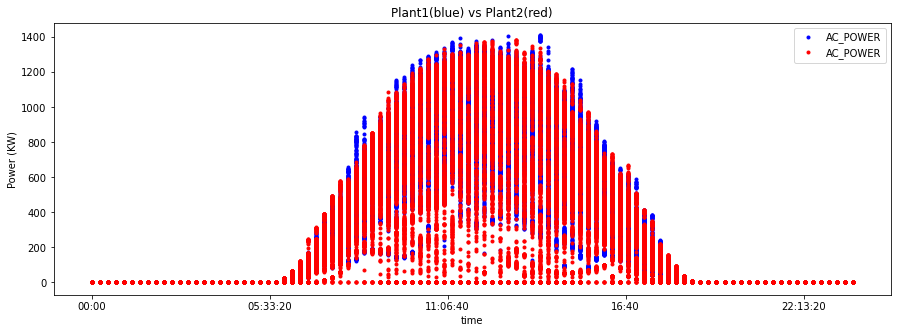

In [324]:
#comparing ac power of two generation plants
ax = df1_generation.plot(x='time', y='AC_POWER', figsize=(15,5), legend=True, style='b.')
df2_generation.plot(x='time', y='AC_POWER', legend=True, style='r.', ax=ax)
plt.title('Plant1(blue) vs Plant2(red)')
plt.ylabel('Power (KW)')

The two plants has almost the same ac power

In [325]:
p1_daily_dc = df1_generation.groupby('date')['DC_POWER'].agg('sum')#grouping dc power of plant1 generation and finding sum of it

In [326]:
p2_daily_dc = df2_generation.groupby('date')['DC_POWER'].agg('sum')#grouping dc power of plant2 generation and finding sum of it

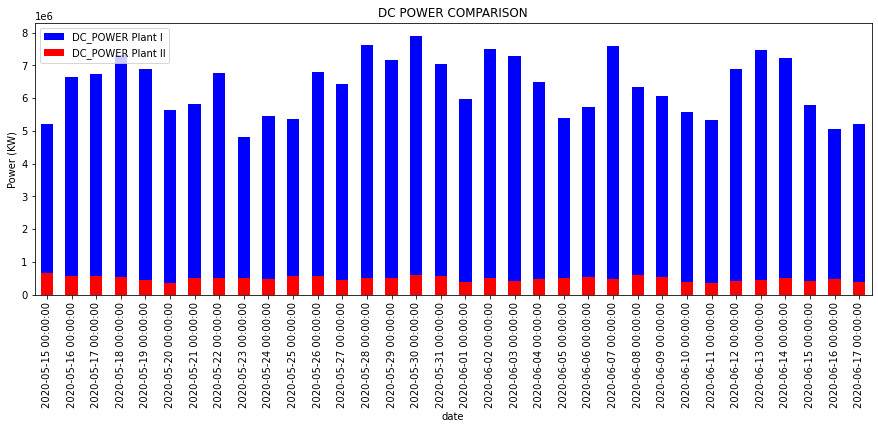

In [327]:
#comparing dc poower of plant1 generation and plant2 generation for 1 day
axh = p1_daily_dc.plot.bar(legend=True, figsize=(15,5), color='Blue', label='DC_POWER Plant I')
p2_daily_dc.plot.bar(legend=True, color='Red', label='DC_POWER Plant II', stacked=False)
plt.title('DC POWER COMPARISON')
plt.ylabel('Power (KW)')
plt.show()


Each date plant1 is huge to produce a dc power but plant 2 reach almost 1 GW.

In [328]:
p1_daily_ac = df1_generation.groupby('date')['AC_POWER'].agg('sum')#grouping dc power of plant1 generation and finding sum of it

In [329]:
p2_daily_ac = df2_generation.groupby('date')['AC_POWER'].agg('sum')#grouping dc power of plant1 generation and finding sum of it

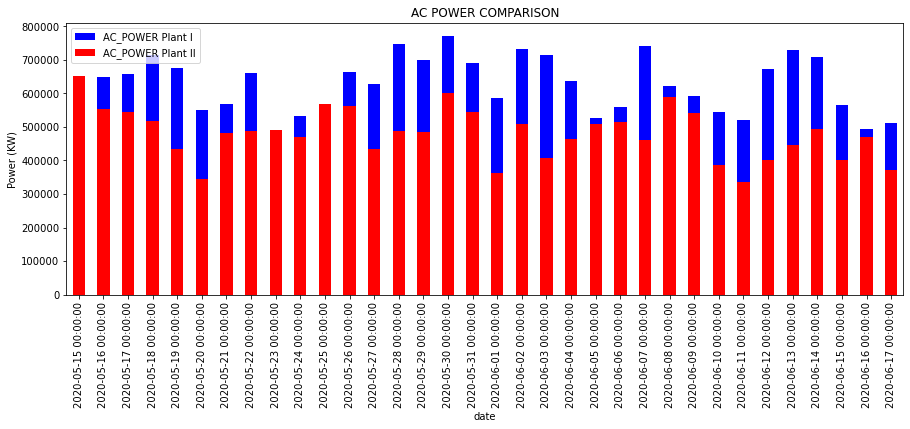

In [330]:
#comparing ac power of plant1 generation and plant2 generation
ac = p1_daily_ac.plot.bar(legend=True, figsize=(15,5), color='Blue', label='AC_POWER Plant I')
p2_daily_ac.plot.bar(legend=True, color='Red', label='AC_POWER Plant II')
plt.title('AC POWER COMPARISON')
plt.ylabel('Power (KW)')
plt.show()

Plant I and Plant II are almost same to produce a ac power for each day.

In [331]:
#compute daily_yield for each date
p1_dyield = df1_generation.groupby('date')['DAILY_YIELD'].agg('sum')#grouping dailyfield  of plant1 generation based on date and performing sum op on it


In [332]:
p2_dyield = df2_generation.groupby('date')['DAILY_YIELD'].agg('sum')#grouping dailyfield  of plant2 generation based on date and performing sum op on it


Text(0.5, 1.0, 'DAILY YIELD COMPARISON')

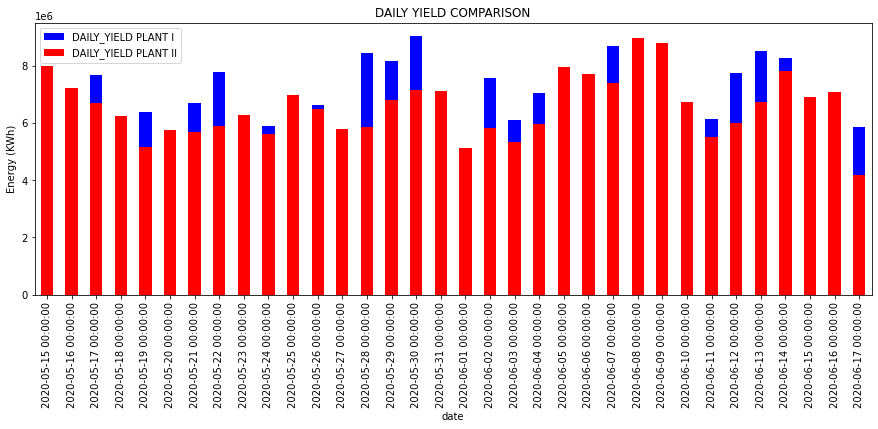

In [333]:
#comparing daily yeilds of two pllants
dy = p1_dyield.plot.bar(figsize=(15,5), legend=True, label='DAILY_YIELD PLANT I', color='Blue')
p2_dyield.plot.bar(legend=True, label='DAILY_YIELD PLANT II', color='Red')
plt.ylabel('Energy (KWh)')
plt.title('DAILY YIELD COMPARISON')

Plant I and plant II have almost same daily yield but certain days, they are differents

In [334]:
#compute a average total_yield for plant I for each day
p1_tyield = df1_generation.groupby('date')['TOTAL_YIELD'].agg('mean')

#compute a average total_yield for plant II for each day
p2_tyield = df2_generation.groupby('date')['TOTAL_YIELD'].agg('mean')

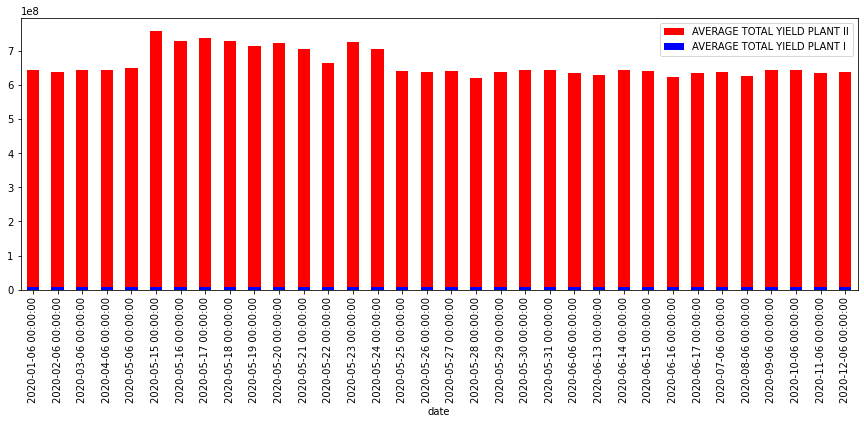

In [335]:
#comparing average of total yeild plant1 generation and plant2 generation
aver = p2_tyield.plot.bar(figsize=(15,5), legend=True, label='AVERAGE TOTAL YIELD PLANT II', color='Red')
p1_tyield.plot.bar(legend=True, label='AVERAGE TOTAL YIELD PLANT I', color='Blue',ax=aver)

The gap between average total yield for plant II and average total yield for plant I for each date is very large.

# Plant I weather sensor vs Plant II weather sensor

In [336]:
#extracting date and time from plant1weather DateTime
df1_weather['DATE_TIME'] = pd.to_datetime(df1_weather['DATE_TIME'], errors='coerce')
df1_weather['time'] = df1_weather['DATE_TIME'].dt.time
df1_weather['date'] = pd.to_datetime(df1_weather['DATE_TIME'].dt.date)
df1_weather['day']=df1_weather['DATE_TIME'].dt.date


In [337]:
#extracting date and time from plant2weather DateTime
df2_weather['DATE_TIME'] = pd.to_datetime(df2_weather['DATE_TIME'], errors='coerce')
df2_weather['time'] = df2_weather['DATE_TIME'].dt.time
df2_weather['date'] = pd.to_datetime(df2_weather['DATE_TIME'].dt.date)
df2_weather['day']=df1_weather['DATE_TIME']

C:\Users\LAKSHMI\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(


NameError: name 'cols' is not defined

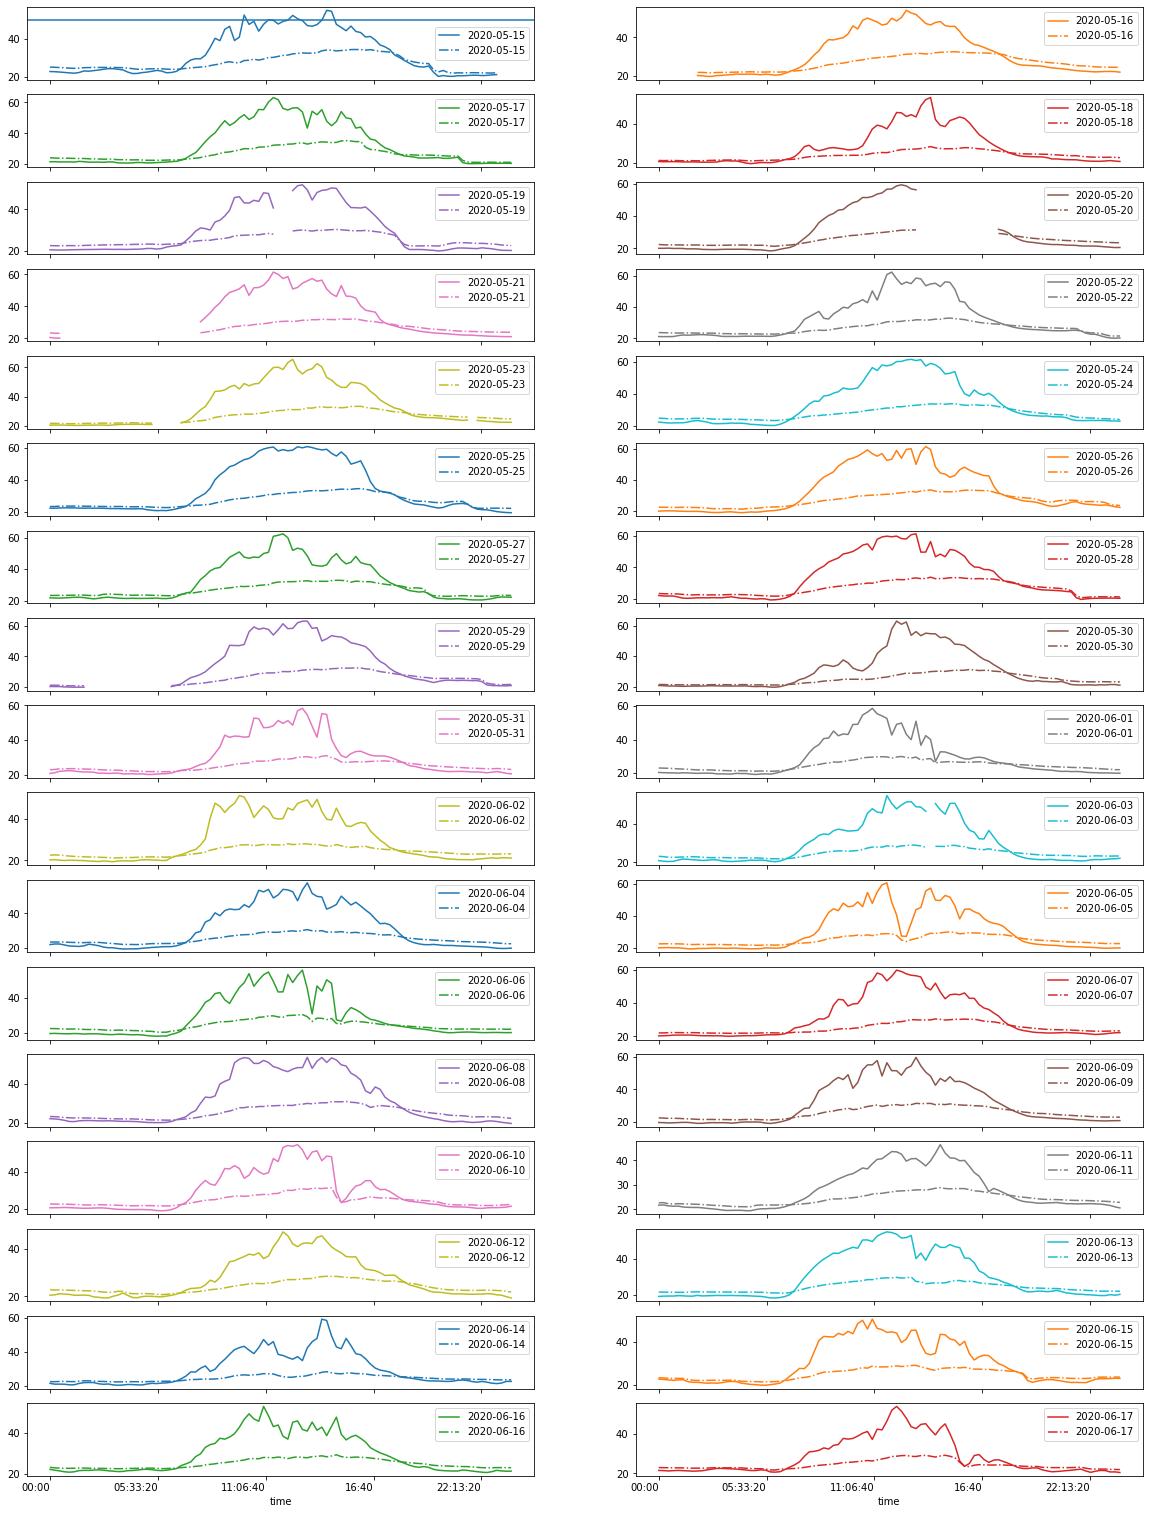

In [339]:
#comparing ambient and module temperature in pant1 
ax= df1_weather.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
df1_weather.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Temperature (°C)')

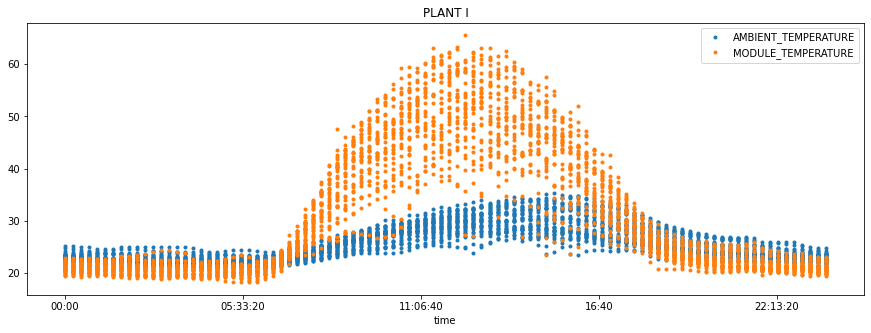

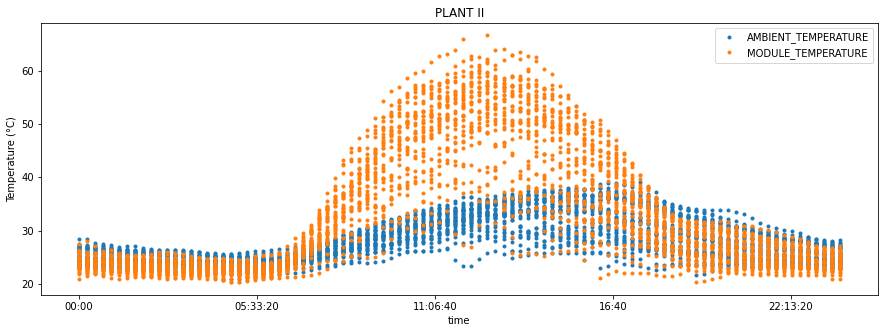

In [340]:
#comparing ambient and module temperature in pant1 and plant 2 separately
df1_weather[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','time']].plot(x='time', label='Plant I', title='PLANT I', figsize=(15,5), style='.')
df2_weather[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','time']].plot(x='time', label='Plant II', title='PLANT II', figsize=(15,5), style='.')
plt.ylabel('Temperature (°C)')

Text(0.5, 1.0, 'IRRADIATION COMPARISON')

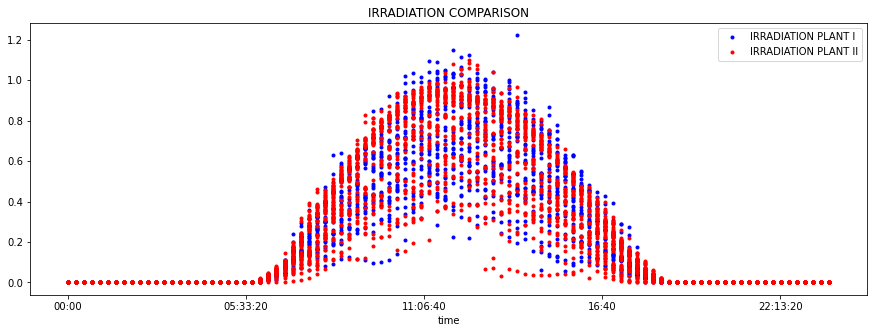

In [341]:
#compare IRRADIATION PLANT I VS PLANT II
aq = df1_weather.plot(x='time', y='IRRADIATION', legend=True, label='IRRADIATION PLANT I', color='Blue', style='.', figsize=(15,5))
df2_weather.plot(x='time', y='IRRADIATION', legend=True, label='IRRADIATION PLANT II',  color='Red', style='.', ax=aq)
plt.title('IRRADIATION COMPARISON')

Plant I and Plant II have same IRRADIATION distribution between 05:33:20 and 18:00:00

In [352]:
df2_generation["DATE_TIME"] = pd.to_datetime(df2_generation["DATE_TIME"])
df2_weather["DATE_TIME"] = pd.to_datetime(df2_weather["DATE_TIME"])


In [353]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2_generation['NEW_SOURCE_KEY'] = le.fit_transform(df2_generation["SOURCE_KEY"])
df2_generation.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,NEW_SOURCE_KEY
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,1
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,3
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4


In [354]:
df2_generation = df2_generation[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD','NEW_SOURCE_KEY']]
df2_weather = df2_weather[['DATE_TIME','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]


In [355]:
df2=pd.merge(df2_generation,df2_weather, on="DATE_TIME", how="inner")
df2.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,NEW_SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0.0,0.0,9425.000000,2.429011e+06,0,27.004764,25.060789,0.0
1,2020-05-15,0.0,0.0,0.000000,1.215279e+09,1,27.004764,25.060789,0.0
2,2020-05-15,0.0,0.0,3075.333333,2.247720e+09,2,27.004764,25.060789,0.0
3,2020-05-15,0.0,0.0,269.933333,1.704250e+06,3,27.004764,25.060789,0.0
4,2020-05-15,0.0,0.0,3177.000000,1.994153e+07,4,27.004764,25.060789,0.0


In [356]:
df2 = df2.drop('DATE_TIME',axis=1)
df2 = df2.drop('NEW_SOURCE_KEY',axis=1)
df2 = df2.drop('TOTAL_YIELD',axis=1)
df2.head()

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0.0,0.0,9425.000000,27.004764,25.060789,0.0
1,0.0,0.0,0.000000,27.004764,25.060789,0.0
2,0.0,0.0,3075.333333,27.004764,25.060789,0.0
3,0.0,0.0,269.933333,27.004764,25.060789,0.0
4,0.0,0.0,3177.000000,27.004764,25.060789,0.0


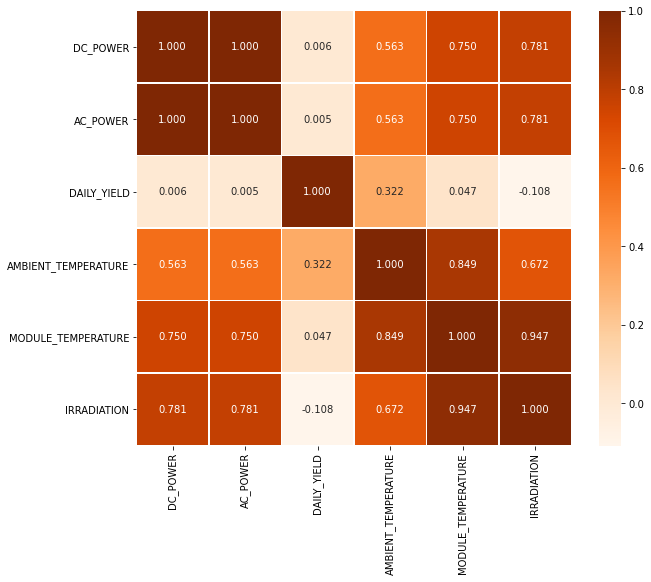

In [347]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True,cmap='Oranges')
plt.show()

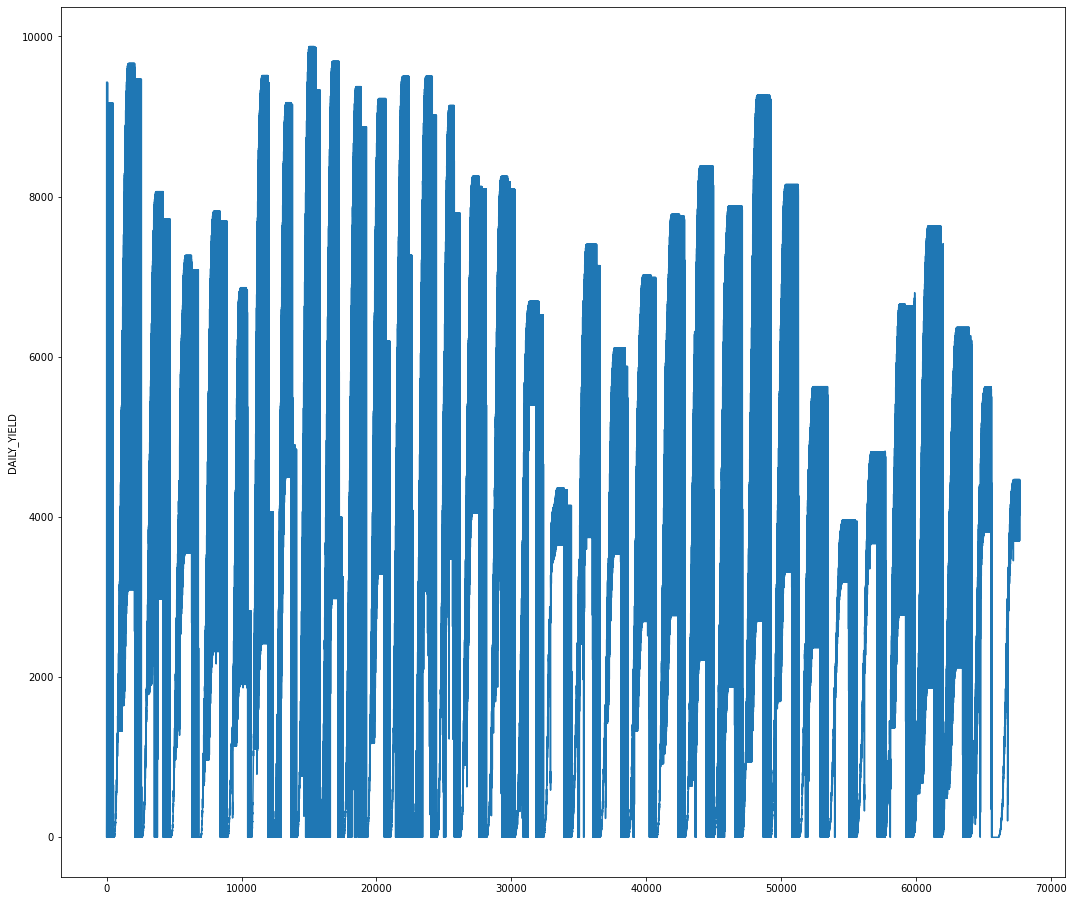

In [357]:
fig = plt.figure(figsize=(18,16))
sns.lineplot(x=df2.index,y='DAILY_YIELD',data=df2)
plt.show()

In [358]:
X = df2.drop('DAILY_YIELD',axis=1)
y = df2['DAILY_YIELD']

In [359]:
#Splitting the dataset into Train set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [360]:
x_train.head()

,DC_POWER,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
26725,731.393333,716.166667,34.056837,50.498090,0.629698
39440,574.733333,563.213333,29.019923,36.561087,0.375421
30715,674.314286,660.471429,32.961009,51.626102,0.480824
3686,1.100000,1.057143,29.609058,26.478030,0.000000
5246,677.892857,663.950000,33.679463,44.842006,0.455365


In [361]:
y_train.head()

26725    1412.400000
39440    2538.333333
30715    2182.642857
3686     7721.000000
5246     3361.428571
Name: DAILY_YIELD, dtype: float64

In [362]:
#Fit Decision Tree Rgerssion Model to the dataset
from sklearn.tree import DecisionTreeRegressor

#Create the Decision Tree regressor object 
regressor1 = DecisionTreeRegressor(random_state=0)


In [363]:
#Fit the regressor object to the dataset.
regressor1.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [364]:
accuracy=regressor1.score(x_train,y_train)
print("decision treeAccuracy of the model:", accuracy*100)

decision treeAccuracy of the model: 74.18321440126891


In [365]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()

In [366]:
#Fit the regressor object to the dataset.
regressor2.fit(x_train,y_train)

LinearRegression()

In [367]:
accuracy = regressor2.score(x_train,y_train)
print("Accuracy of the model : ", accuracy*100)

Accuracy of the model :  32.679066329306835


In [368]:
from sklearn.metrics import r2_score
#dtraccuracy=r2_score(y_test,accuracy )

In [369]:

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [370]:
rfrpred=rfr.predict(x_test)

In [371]:
rfrpred

array([3803.77190476, 4735.81761905, 4370.48708504, ..., 5200.22761905,
       5025.21380952, 5490.21952381])

In [372]:
y_test

64664    3951.266667
28822    4880.285714
42357    2769.000000
11732    9292.000000
50921    6456.000000
            ...     
53241    5480.000000
11103    3863.214286
28922    6250.466667
11340    8227.333333
25164    6542.933333
Name: DAILY_YIELD, Length: 6770, dtype: float64

In [373]:
rfraccuracy=r2_score(y_test,rfrpred)

In [374]:
print("Accuracy of the random forest model : ", rfraccuracy*100)

Accuracy of the random forest model :  60.32381984423114


In [1]:
import pickle
pickle.dump(regressor1, open('model.pkl','wb'))

NameError: name 'regressor1' is not defined

In [376]:
model=pickle.load(open('model.pkl','rb'))
input=[[7913.375000,	774.187500,	27.712921,	43.051187,	0.592494]]
pred=model.predict(input)
pred

array([983.85714286])